In [2]:
library(tidyverse)
options(repr.plot.width=5, repr.plot.height=4)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# STATS 306
## Homework 4: Exploratory data analysis

For each problem, enter the R code in the cell marked "YOUR SOLUTION HERE".

## Problem 1: Whisker plots
Suppose you are given the following whisker plot for $n=500$ samples of a random variable $x$:
![whiser](https://i.imgur.com/HazzZQQ.png)

## Problem 1: Whisker plots 

This question is worth 1 point overall. 

**(a)** About how many samples were between 0.2 and 0.5?  

    25% of the total samples (so 125 samples) were between 0.2 and 0.5

**(b)** The bottom of the "box" is at 0.0. What is this value typically called? Explain how this is calculated. 

In this graph an x value of 0.0 is the 1st quartile (or lower quartile). This mean that all values of 0 and less take up 25% of the data. The 1st quartile term is calculated with the folowing equation: (N+1) * (1 / 4)th term is the lower quartile with N being the number of data points.

**(c)** Explain what this plot tells us about our variable x. Why might you choose to make this plot? 

From this bot and whisker plot we see that the dependent variable is fairly symmetric with a medium of 0.1, a maxium of 0.5, and a miniumum of around -2.75. Additionaly, few outliers exist on both ends of the graph. Box and whisker plots are chosen to be made when you want to understand the distribution of data points within a range of values

## Problem 2: Understanding air quality
This problem uses the air quality dataset that we studied in lecture:

In [3]:
load(url('https://datasets.stats306.org/pm25.RData'))

In [ ]:
print(pm25)

# A tibble: 2,640,700 × 7
   date       state   county    lat   lon  pm25   aqi
   <date>     <chr>   <chr>   <dbl> <dbl> <dbl> <dbl>
 1 2017-01-01 Alabama Baldwin  30.5 -87.9   5      21
 2 2017-01-04 Alabama Baldwin  30.5 -87.9   5.3    22
 3 2017-01-10 Alabama Baldwin  30.5 -87.9   4.5    19
 4 2017-01-13 Alabama Baldwin  30.5 -87.9   7.2    30
 5 2017-01-16 Alabama Baldwin  30.5 -87.9   3.9    16
 6 2017-01-19 Alabama Baldwin  30.5 -87.9   4.6    19
 7 2017-01-22 Alabama Baldwin  30.5 -87.9   7      29
 8 2017-01-25 Alabama Baldwin  30.5 -87.9   4.2    18
 9 2017-01-28 Alabama Baldwin  30.5 -87.9   5.7    24
10 2017-01-31 Alabama Baldwin  30.5 -87.9   3.4    14
# … with 2,640,690 more rows


For each of the questions, produce an appropriate plot that visualizes the distribution or statistic, and explain why this type of plot is appropriate. (Note: multiple correct answers are possible.)

**(a)** The overall distribution of `pm25` across the entire dataset. (1/2 point)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


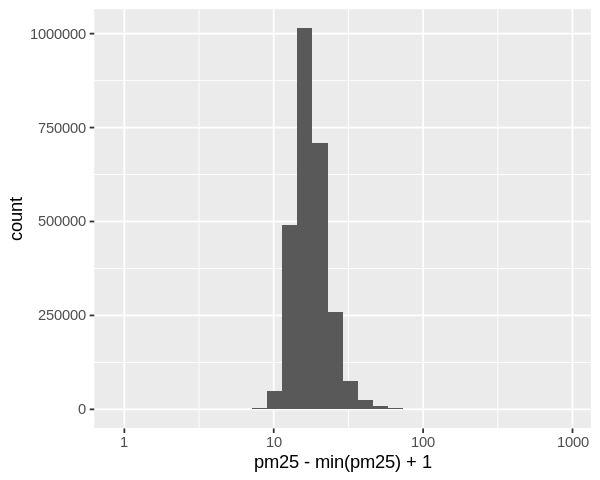

In [ ]:
ggplot(pm25, aes(x=pm25 - min(pm25) + 1))+
  geom_histogram() + scale_x_log10()

A histogram is most appropriate for this question as we are curious about the distrubution of a continuous variable (pm25). 

**(b)** The joint distribution of `pm25` and day of the week, considering only cases where `pm25` was less than 100. (1/2 point)  

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


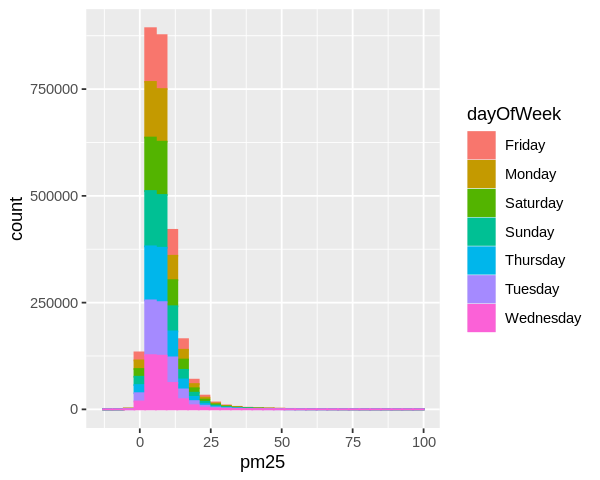

In [ ]:
pm25 %>% 
  filter(pm25 <100) %>%
  mutate(dayOfWeek = weekdays(date)) %>%
  ggplot(aes(x=pm25, color = dayOfWeek, fill=dayOfWeek)) +
  geom_histogram()

A colored cordinated histogram is the most appropriate graph for this problem as we are curious about the distrubution of two variables (pm25 being continious and dayOfWeek being discrete).

**(c)** The average `pm25` level for each month for Midwest states. We've provided a vector defining Midwestern states. Please use this in your answer! (1 point) 

In [ ]:
midwest_states <- c("Illinois", "Indiana", "Iowa", "Kansas", "Michigan", "Minnesota", "Missouri", "Nebraska", "North Dakota", "Ohio", "South Dakota", "Wisconsin")

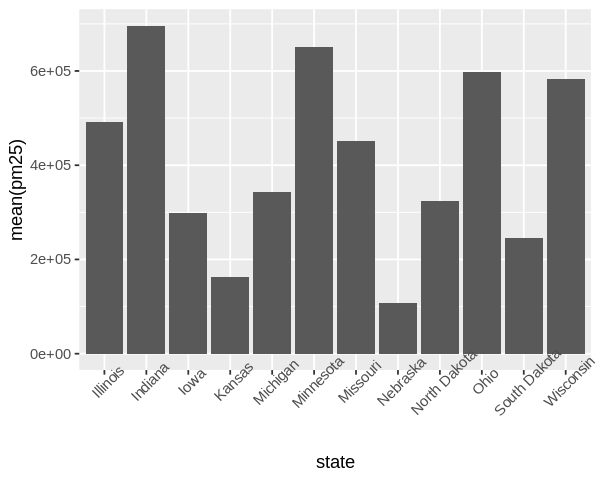

In [ ]:
pm25 %>%
  filter(state %in% midwest_states) %>%
  ggplot(aes(x = state, y = mean(pm25))) +
  geom_bar(stat = "identity") +
  theme(axis.text.x = element_text(angle=45))

A bar graph is the most appropriate for this question as we are curious how a discrete varaible (state) relates to a continuous variable (the mean pm25).

**(d)** The US EPA considers PM2.5 levels greater than $35 \mu g/m^3$ to be dangerous. For each day, plot the proportion of counties in California with PM2.5 levels considered to be dangerous, out of all counties in California. What do you notice? Can you think of a reason to explain this pattern? (1 point)


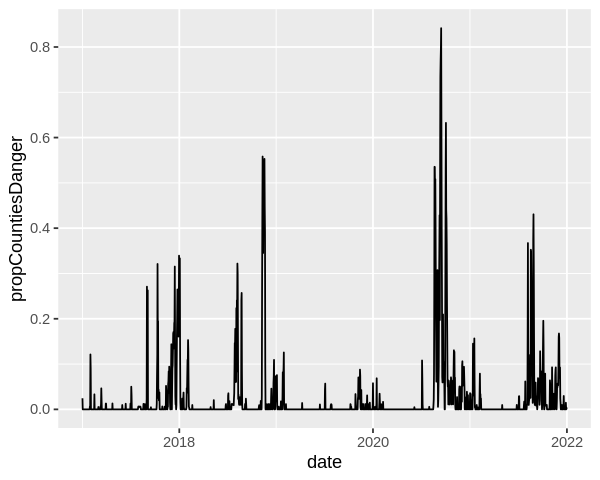

In [ ]:
pm25 %>% 
  filter(state == "California") %>%
  mutate(isDangerous = (pm25 > 35)) %>% 
  group_by(date) %>%
  summarise(propCountiesDanger = mean(isDangerous)) %>%
  ggplot(aes(x=date, y=propCountiesDanger)) +
  geom_line() 

A line graph is most appropriate for this question because we are curious how a continuous variable (date) relates to another continuous variable (the proportion of counties in Califorina considered to be dangerous). It seems as if some dates (such as just before 2019 and 2021) have spikes in the proportion of counties in Califorina considered to be dangerous. Although not as pronounced, this pattern can be generally seen in the start of other years as well. Perhaps in the winter months towards the end and beginning of the year (such as Dec and Jan), the cold weather traps pollutants into the atmosphere.

**(e)** Define a state to be "large" if it has more than 15 counties, "medium" if it has more than 5 counties and no more than 15, and "small" if it has 5 or less counties. For each year, plot the average PM2.5 level (across all days in that year and all counties) for large, medium, and small states. (1 point)

In [5]:
library("lubridate")


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


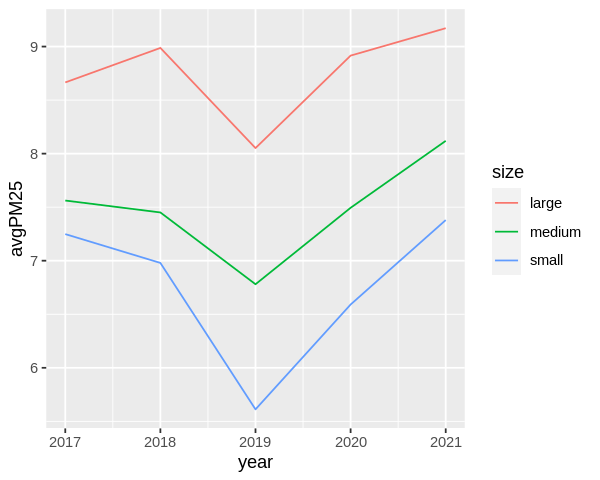

In [13]:
pm25 %>%
  mutate(year = year(as.POSIXlt(date, format="%d/%m/%Y"))) %>%
  group_by(state) %>%
  mutate(countyCount = n_distinct(county)) %>%
  ungroup() %>%
  mutate(size = case_when(countyCount > 15 ~ "large",
                        countyCount > 5 & countyCount <=15 ~ "medium", 
                        countyCount < 5 ~ "small")) %>%
  group_by(year, size)%>%
  summarise(avgPM25 = mean(pm25)) %>%
  na.omit() %>%
  ggplot(aes(x=year, y = avgPM25, color = size)) +
  geom_line()



A colored line graph is most appropriate for this question because we are curious how a continuous variable (date) relates to another continuous variable (avgPM25) based off a discrete variable (size).

## Problem 3: College football
The next few questions use a new data set. The file `cfb.RData` contains a table called `cfb` with information on 5,116 college football games played from 2011 to 2017:

In [15]:
load(url('https://datasets.stats306.org/cfb.RData'))
head(cfb)

year,game,count,conf_game,week,winning,winning_conference,winning_h_a_n,winning_points,winning_f_u,⋯,losing_total_plays,losing_total_yards,losing_ypp,losing_to,losing_pen_yards,losing_top,ot?,thursday?,top_verification,o_u_total
<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,⋯,<int>,<int>,<dbl>,<int>,<int>,<int>,<chr>,<chr>,<int>,<chr>
2011,1,1,Y,1,FIU,Sun Belt,H,41,F,⋯,73,301,4.12,1,45,1967,N,Y,3600,NA
2011,2,1,N,1,Wisconsin,Big 10,H,51,F,⋯,65,292,4.49,0,65,2060,N,Y,3600,NA
2011,3,1,N,1,Mississippi State,SEC,A,59,F,⋯,87,338,3.89,3,55,2240,N,Y,3600,NA
2011,4,1,N,1,Syracuse,Big East,H,36,F,⋯,84,406,4.83,1,94,2024,Y,Y,3600,NA
2011,5,1,N,1,Bowling Green,MAC,A,32,U,⋯,65,280,4.31,3,45,1181,N,Y,3600,NA
2011,6,1,N,1,Kentucky,SEC,N,14,F,⋯,69,234,3.39,4,120,2040,N,Y,3600,NA


(Each row of the table is one game, and contains various statistics for both the winning and losing teams.)

**(a)** College football is divided into various conferences. (UM is in the Big Ten conference.) **A conference game is a game where the `winning_conference` and `losing_conference` are the same**. For example, row 4631 of CFB is a conference game between Western Michigan and Buffalo, both in the Mid-American Conference. A total of 139 points were scored:

In [ ]:
cfb %>% slice(4631) %>% 
    select(winning, winning_conference, winning_points, 
           losing, losing_conference, losing_points)

winning,winning_conference,winning_points,losing,losing_conference,losing_points
<chr>,<chr>,<int>,<chr>,<chr>,<int>
W. Michigan,MAC,71,Buffalo,MAC,68


Certain conferences have a reputation for being higher scoring. Investigate this by restricting to conference games and producing a box-and-whisker plot that shows the distribution of total number of points scored per game (ppg) by conference from **2011 to 2015**. Ensure that the conference names in the plot are legible, and sort the conferences in order of the median ppg. Which conference had the highest scores? The lowest? Do you think these differences are real, or arose due to chance? (1 point)

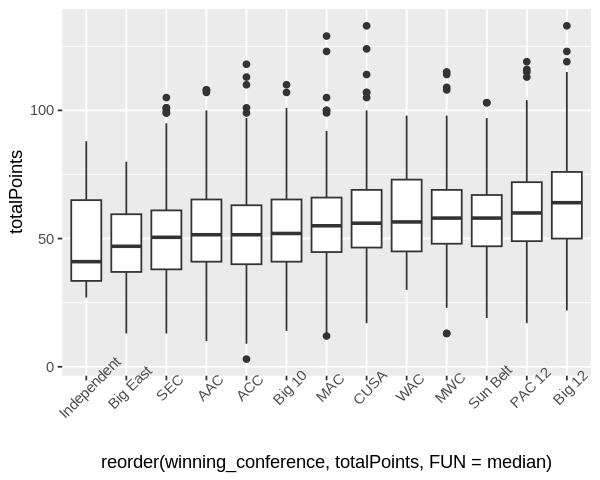

In [ ]:
cfb %>%
  filter(year >= 2011 & year <= 2015) %>%
  filter(winning_conference == losing_conference) %>%
  mutate(totalPoints = winning_points + losing_points) %>%
  ggplot(aes(x = reorder(winning_conference, totalPoints, FUN = median), y=totalPoints)) +
  geom_boxplot() +
  theme(axis.text.x = element_text(angle=45))

The Big12 is the conference with the highest median total score and Independent teams had the lowest median score. I think these differences are real and did not arouse due to chance as it make sense for better (and therefore higher scoring players) to join the Big12 than a small independent team.

**(b)** In football, two main offensive tactics to gain yardage territory are rushing and passing. Using the techniques we learned in class for filtering and reshaping data, create a new table which contains only the data among Big 10 conference teams and shows the passing and rushing yardage for each year and week for each team. (1 point) 

If we sort such a table chronologically and in alphabetical order of team name, the first few rows are:

    # A tibble: 774 × 5
      year week  team           pass_yards rush_yards
      <int> <fct> <chr>              <int>      <int>
    1  2011 5     Michigan             217        363
    2  2011 5     Illinois             391         82
    3  2011 5     Penn State           271        193
    4  2011 5     Michigan State       250         71
    5  2011 5     Wisconsin            255        231

Note: It is fine to create two dataframes and combine them together at the end. 

In [27]:
winningPoints <- cfb %>%
  filter(winning_conference == "Big 10", conf_game == "Y") %>%
  rename(team = winning, rush_yards = winning_rush_yards, pass_yards = winning_pass_yards) %>%
  select(year, week, team, pass_yards, rush_yards) %>%
  group_by(year, week) %>%
  arrange(year)

losingPoints <- big10 %>%
  filter(losing_conference == "Big 10", conf_game == "Y") %>%
  rename(team = losing, rush_yards = losing_rush_yards, pass_yards = losing_pass_yards) %>%
  select(year, week, team, pass_yards, rush_yards) %>%
  group_by(team, week) %>%
  arrange(year)

combined <- rbind(winningPoints, losingPoints) %>%
            arrange(year, as.integer(week), team)
  
combined

year,week,team,pass_yards,rush_yards
<int>,<chr>,<chr>,<int>,<int>
2011,5,Illinois,391,82
2011,5,Indiana,184,72
2011,5,Michigan,217,363
2011,5,Michigan State,250,71
2011,5,Minnesota,104,73
2011,5,Nebraska,176,159
2011,5,Northwestern,160,169
2011,5,Ohio State,143,35
2011,5,Penn State,271,193


**(c)** Some teams rely more on passing to gain yardage, while other rely more on rushing. Create an appropriate 
plot that visualizes the joint distribution of passing and rushing yardage for each team over. In your opinion, are there any outliers? What are they? Is there any reason for them to be outlying? (1 point) 

Note: you may need to use dplyr to extract the outliers from the table data. 

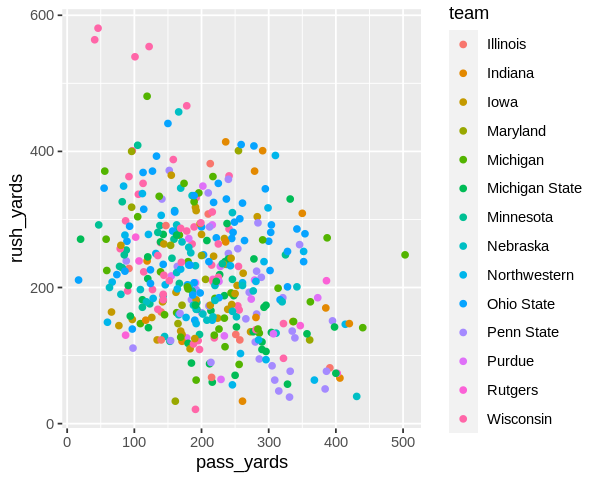

In [28]:
final %>%
  na.omit() %>%
  ggplot(aes(x=pass_yards, y= rush_yards, color = team, fill=team)) +
  geom_point()

Yes, there are outliers in the graph above. The most prominent ones are Wisconsin's 4 dots in the upper left corner. Although Wisconsin has somewhat of a usual pass yard millage for those weeks, they have extremely high rush yard milleage. Similarly, Michigan has a normal rush yard milleage but an extremely high pass yard milleage all the way to the right of the graph. You can tell these points are outliers as they stand far away from the cluster of the points in the center of the graph.

## Problem 4 (Challenge problem) 
The column `winning_h_a_n` shows whether the winning team was playing at **H**ome, **A**way, or on a **N**eutral field (not home to either team). Filter only to the records related to Michigan and produce a table which has five columns: `year`, `week`, `points`, `venue`, `outcome` where venue is `H/A/N` for `Home/Away/Neutral` and outcome is `winning` or `losing`. A subset of this table is provided below for reference: 

    # A tibble: 176 × 5
        year week  venue outcome points
       <int> <chr> <chr> <chr> <int>  
     1  2011  1      H   winning   34        
     2  2011  1      A   losing    10             
     3  2011  2      H   winning   35              
     4  2011  2      A   losing    31      
     5  2011  3      H   winning   31                          
     6  2011  3      A   losing    3             
     7  2011  4      H   winning   28             
     8  2011  4      A   losing    7            
     9  2011  5      H   winning   58       
     10 2011  5      A   losing    0           

Michigan Stadium, nicknamed "The Big House," is the football stadium for the University of Michigan with the capacity of 107,601 which can potentially house 100,000+ Wolverine fans.

Does Michigan win more *at the Big House* ? In other words, is the proportion of games won by Michigan statistically different from proportion of games won by the away team at the Big House ? Use the above table to perform a hypothesis test and draw conclusion.

(Hint: In STATS 250 you learned how to test this. This test is implemented in R using the binom.test function.)

In [ ]:
michigan <- cfb %>%
  filter(winning == "Michigan" | losing == "Michigan") %>%
  mutate(venue = case_when(winning == "Michigan" ~ winning_h_a_n,
                            losing == "Michigan" & winning_h_a_n == "H" ~ "A", 
                            losing == "Michigan" & winning_h_a_n == "A" ~ "H",
                            losing == "Michigan" & winning_h_a_n == "N" ~ "N"))  %>%
  mutate(points = case_when(winning == "Michigan" ~ winning_points,
                            losing == "Michigan" ~ losing_points)) %>%
  mutate(outcome = case_when(winning == "Michigan" ~ "winning",
                            losing == "Michigan" ~  "losing")) %>%
  select(year, week, venue, outcome, points)

In [ ]:
michigan %>% print

# A tibble: 88 × 5
    year week  venue outcome points
   <int> <chr> <chr> <chr>    <int>
 1  2011 1     H     winning     34
 2  2011 2     H     winning     35
 3  2011 3     H     winning     31
 4  2011 4     H     winning     28
 5  2011 5     H     winning     58
 6  2011 6     A     winning     42
 7  2011 7     A     losing      14
 8  2011 9     H     winning     36
 9  2011 10    A     losing      16
10  2011 11    A     winning     31
# … with 78 more rows


In [ ]:
michigan %>%
  mutate(won = case_when(outcome == "winning" ~ TRUE,
                         outcome == "losing" ~  FALSE))%>%
  group_by(venue)%>%
  summarise(winNum = sum(won))

venue,winNum
<chr>,<int>
A,16
H,38
N,3


In [ ]:
michigan %>%
  filter(venue == "H")

year,week,venue,outcome,points
<int>,<chr>,<chr>,<chr>,<int>
2011,1,H,winning,34
2011,2,H,winning,35
2011,3,H,winning,31
2011,4,H,winning,28
2011,5,H,winning,58
2011,9,H,winning,36
2011,12,H,winning,45
2011,13,H,winning,40
2012,2,H,winning,31


In [ ]:
binom.test(x = 38, n=47, p = .5, alternative = "two.sided" )


	Exact binomial test

data:  38 and 47
number of successes = 38, number of trials = 47, p-value = 2.49e-05
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.6674027 0.9085084
sample estimates:
probability of success 
             0.8085106 


Since the p value is so small (less than 5%) we can reject the null hypothesis and instead accept the alternative hypothesis. In other words, the proportion of games won by Michigan IS statistically different from proportion of games won by the away team at the Big House.